In [1]:
import os
import pickle
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from kumaraswamy import Kumaraswamy
from concrete import BinaryConcrete
from uniform import CustomUniform
from hard_kumaraswamy import StretchedAndRectifiedDistribution

In [2]:
# a = torch.rand(3,2)
# b = torch.rand(3,2)

a = torch.tensor([0.139])
b = torch.tensor([0.286])

# kuma_prior = Kumaraswamy(torch.zeros_like(a), torch.zeros_like(b))
kuma_prior = Kumaraswamy(a, b)
kuma_post  = Kumaraswamy(a, b)

print(kuma_prior.sample())
# print(kuma_post.sample())

# print(kuma_prior.log_prob(kuma_prior.sample()))

kl_divs = []

for i in range(100):
    kl_div = torch.distributions.kl.kl_divergence(kuma_post, kuma_prior)
    kl_divs.append(kl_div)

kl_divs = torch.tensor(kl_divs)
print('KL Divergence: {}'.format(torch.mean(kl_div)))

tensor([0.6926])
KL Divergence: -0.7312003374099731


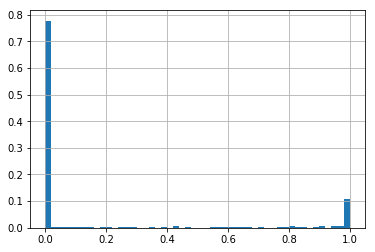

In [3]:
a = torch.tensor([.0005])
b = torch.tensor([.225])

kuma = Kumaraswamy(a, b)

h_kuma = StretchedAndRectifiedDistribution(kuma)
samples = [h_kuma.sample() for _ in range(1000)]

n, bins, _ = plt.hist(samples, density=False, bins=50, weights=np.ones(len(samples)) / len(samples))
plt.grid()
plt.show()

In [4]:
# a = torch.tensor([0.139])
# b = torch.tensor([0.286])

a = torch.tensor([.0005])
b = torch.tensor([.225])

kuma   = Kumaraswamy(a, b)
h_kuma = StretchedAndRectifiedDistribution(kuma)
start  = 0.

print(' val  -log_prob    prob')

for i in range(11):
    l_prob = h_kuma.log_prob(torch.tensor(start))
    print('{:.2f}    {:.4f}    {:.4f}'.format(start, -l_prob.item(), torch.exp(l_prob).item()))
    start += 0.1

 val  -log_prob    prob
0.00    0.2514    0.7777
0.10    2.0338    0.1308
0.20    2.2427    0.1062
0.30    2.3529    0.0951
0.40    2.4036    0.0904
0.50    2.4095    0.0899
0.60    2.3748    0.0930
0.70    2.2967    0.1006
0.80    2.1632    0.1150
0.90    1.9436    0.1432
1.00    2.2131    0.1094


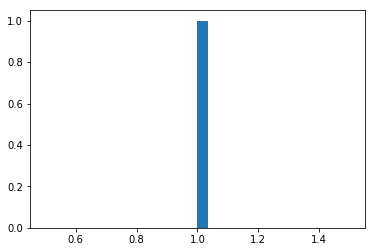

In [5]:
a = torch.tensor([.0])
b = torch.tensor([.0])

kuma = Kumaraswamy(a, b)

m = StretchedAndRectifiedDistribution(kuma)
samples = [m.sample() for _ in range(1000)]

n, bins, _ = plt.hist(samples, density=False, bins=30, weights=np.ones(len(samples)) / len(samples))

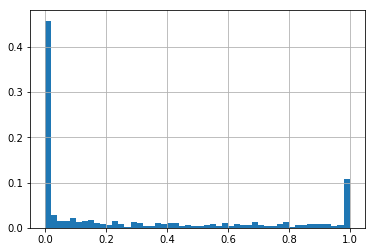

In [6]:
concrete = BinaryConcrete(temperature=0.5, probs=0.3)
m        = StretchedAndRectifiedDistribution(concrete)

samples  = [m.sample() for _ in range(1000)]

n, bins, _ = plt.hist(samples, density=False, bins=50, weights=np.ones(len(samples)) / len(samples))
plt.grid()
plt.show()

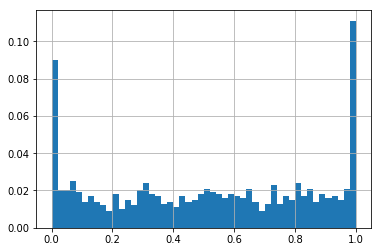

In [7]:
uniform   = CustomUniform(low=0, high=1)
h_uniform = StretchedAndRectifiedDistribution(uniform)

samples  = [h_uniform.sample() for _ in range(1000)]

n, bins, _ = plt.hist(samples, density=False, bins=50, weights=np.ones(len(samples)) / len(samples))
plt.grid()
plt.show()

In [9]:
temp = torch.tensor([0.5])

print(temp)

concrete1   = BinaryConcrete(temperature=temp, probs=0.3)
h_concrete1 = StretchedAndRectifiedDistribution(concrete)

temp = torch.tensor([0.6])
concrete   = BinaryConcrete(temperature=temp, probs=0.9)
h_concrete = StretchedAndRectifiedDistribution(concrete)

# samples  = [m.sample() for _ in range(1000)]

# n, bins, _ = plt.hist(samples, density=False, bins=50, weights=np.ones(len(samples)) / len(samples))
# plt.grid()
# plt.show()

kl_div = torch.distributions.kl.kl_divergence(h_concrete1, h_concrete1)
print(kl_div)

tensor([0.5000])
tensor([0.6000])
<class 'torch.Tensor'>
tensor([0.6000])
<class 'torch.Tensor'>
tensor([0.6000])
<class 'torch.Tensor'>
tensor([0.6000])
<class 'torch.Tensor'>
tensor([0.6000])
<class 'torch.Tensor'>
tensor([0.6000])
<class 'torch.Tensor'>
tensor([0.], grad_fn=<AddBackward0>)
